<a href="https://colab.research.google.com/github/Jushef/Time-Series/blob/main/Covid%2019/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Covid 19 Mexico 2020**

In [1]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 5.5 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=ea87c000cec5e41b916549d1c6506d8a052c7feb319eacaf56177f67119271f6
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from fbprophet import Prophet
import pycountry

In [7]:
raw_trian = 'https://raw.githubusercontent.com/ecabestadistica/curso-series-temporales/master/12.%20Prediciendo%20el%20futuro/Python/train.csv'
raw_test = 'https://raw.githubusercontent.com/ecabestadistica/curso-series-temporales/master/12.%20Prediciendo%20el%20futuro/Python/test.csv'
train = pd.read_csv(raw_trian)
test = pd.read_csv(raw_test)
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [8]:
train.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
28791,35656,NaN,Zimbabwe,2020-04-18,25.0,3.0
28792,35657,NaN,Zimbabwe,2020-04-19,25.0,3.0
28793,35658,NaN,Zimbabwe,2020-04-20,25.0,3.0
28794,35659,NaN,Zimbabwe,2020-04-21,28.0,3.0
28795,35660,NaN,Zimbabwe,2020-04-22,28.0,4.0


* Vemos que el conjunto de datos de entrenamiento llega hasta el 22-04-2020. Veamos una muestra aleatoria dentro del conjunto de entrenamiento

In [9]:
train.sample(15)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
3452,4267,NaN,Cambodia,2020-03-10,2.0,0.0
19880,24633,NaN,Singapore,2020-01-30,10.0,0.0
23772,29449,Maryland,US,2020-02-27,0.0,0.0
24148,29913,Mississippi,US,2020-03-06,0.0,0.0
20383,25246,NaN,South Sudan,2020-03-13,0.0,0.0
27690,34291,Gibraltar,United Kingdom,2020-04-21,132.0,0.0
24780,30699,New Mexico,US,2020-02-23,0.0,0.0
7177,8894,Shandong,China,2020-01-23,6.0,0.0
2719,3358,NaN,Botswana,2020-03-13,0.0,0.0
20903,25898,NaN,Switzerland,2020-02-10,0.0,0.0


In [10]:
train.isnull().sum()

Id                    0
Province_State    16560
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [11]:
len(train)

28796

* Vamos a deshacernos de la columna problemática que no nos interesa

In [12]:
train = train.drop(['Province_State'],axis=1)

In [13]:
train.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


In [15]:
del train['Id']

#**Prediciendo con Auto-ARIMA para el caso de Mexico.**

In [16]:
df_comp=train.copy()

In [17]:
df_comp.head()

,Country_Region,Date,ConfirmedCases,Fatalities
0,Afghanistan,2020-01-22,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0


In [18]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date", inplace=True)

In [19]:
df_comp.head()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-01-22,Afghanistan,0.0,0.0
2020-01-23,Afghanistan,0.0,0.0
2020-01-24,Afghanistan,0.0,0.0
2020-01-25,Afghanistan,0.0,0.0
2020-01-26,Afghanistan,0.0,0.0


In [20]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 45.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [21]:
from pmdarima.arima import auto_arima

In [22]:
df_m = train[train['Country_Region'] == 'Mexico']

In [23]:
df_m.head()

,Country_Region,Date,ConfirmedCases,Fatalities
15916,Mexico,2020-01-22,0.0,0.0
15917,Mexico,2020-01-23,0.0,0.0
15918,Mexico,2020-01-24,0.0,0.0
15919,Mexico,2020-01-25,0.0,0.0
15920,Mexico,2020-01-26,0.0,0.0


In [24]:
len(df_m)

92

In [25]:
confirmed_m=df_m.groupby('Date')['ConfirmedCases'].sum().to_frame().reset_index()

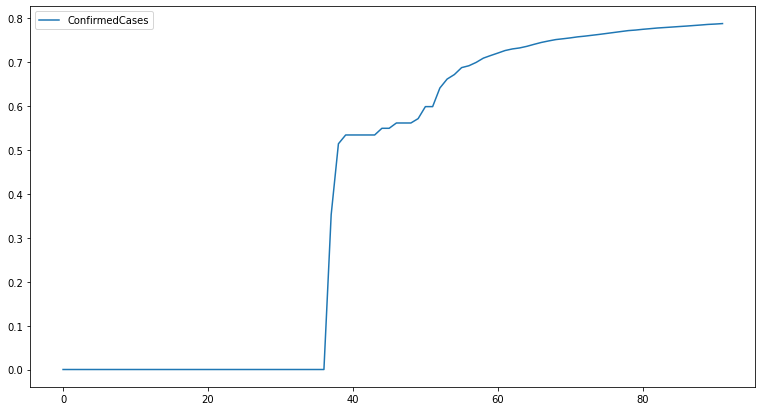

In [29]:
confirmed_m['ConfirmedCases'] = np.log(1+confirmed_m['ConfirmedCases'])
confirmed_m.plot(figsize=(13,7), legend=True, label='Casos Confirmados')
plt.show()

In [50]:
model_auto = auto_arima(df_m['ConfirmedCases'], m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, information_criterion = 'aic')

In [51]:
model_auto

ARIMA(order=(2, 2, 1), scoring_args={}, seasonal_order=(1, 0, 0, 5),
      suppress_warnings=True, with_intercept=False)

In [52]:
model_auto.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1339: RuntimeWarning:

divide by zero encountered in true_divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   92
Model:             SARIMAX(2, 2, 1)x(1, 0, [], 5)   Log Likelihood                -458.280
Date:                            Fri, 21 Jan 2022   AIC                            926.561
Time:                                    23:55:21   BIC                            939.060
Sample:                                         0   HQIC                           931.601
                                             - 92                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2799      0.105      2.674      0.007       0.075       0.485
ar.L2          0.7032      0.083      8.496      0.000       0.541       0.865
ma.L1         -0.8925      0.109     -8.218      0.000      -1.105      -0.680
ar.S.L5       -0.3064      0.091     -3.372      0.001      -0.485      -0.128
sigma2      1512.0180    148.587     10.176      0.000    1220.792    1803.244
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               276.89
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):                inf   Skew:                            -1.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
#Creando el indice del futuro
date = pd.to_datetime("04-23-2020")
date

Timestamp('2020-04-23 00:00:00')

In [54]:
i_date = date + pd.to_timedelta(np.arange(42), 'D')

In [55]:
i_date

DatetimeIndex(['2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03'],
              dtype='datetime64[ns]', freq=None)

In [56]:
predictions=model_auto.predict(len(i_date))

In [57]:
df_test = pd.Series(predictions, index=i_date)
df_test.head()

2020-04-23    10079.710418
2020-04-24    10767.579831
2020-04-25    11368.159833
2020-04-26    12120.261332
2020-04-27    12795.484742
dtype: float64

In [58]:
df_auto_pred = pd.DataFrame({'Predictions': predictions},
                            index = i_date)

In [59]:
df_auto_pred.head(10)

,Predictions
2020-04-23,10079.710418
2020-04-24,10767.579831
2020-04-25,11368.159833
2020-04-26,12120.261332
2020-04-27,12795.484742
2020-04-28,13565.974735
2020-04-29,14309.703822
2020-04-30,15116.660113
2020-05-01,15892.097601
2020-05-02,16720.919629


In [63]:
df = df_comp[df_comp['Country_Region'] == 'Mexico']

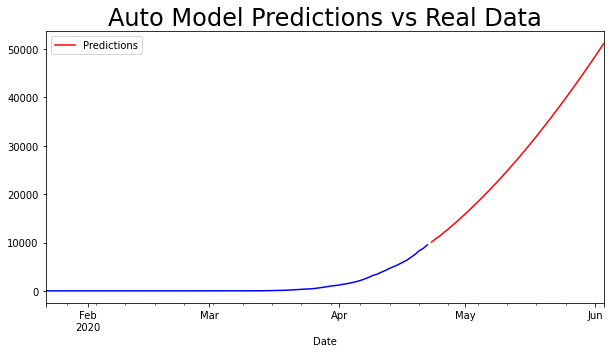

In [64]:
df_auto_pred.plot(figsize = (10,5), color = "red")
df.ConfirmedCases.plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

##**Facebook Prophet**

In [71]:
confirmed_m=df_m.groupby('Date')['ConfirmedCases'].sum().to_frame().reset_index()
confirmed_m['ConfirmedCases'] = np.log(1+confirmed_m['ConfirmedCases'])

In [72]:
confirmed_m.columns = ['ds','y']
confirmed_m['ds'] = pd.to_datetime(confirmed_m['ds'])
confirmed_m.tail()

,ds,y
87,2020-04-18,8.835792
88,2020-04-19,8.922392
89,2020-04-20,9.019422
90,2020-04-21,9.079434
91,2020-04-22,9.159258


In [73]:
model_m = Prophet(interval_width=0.95)
model_m.fit(confirmed_m)
future_m = model_m.make_future_dataframe(periods=30)
future_confirmed_m = future_m.copy() 
future_m

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
117,2020-05-18
118,2020-05-19
119,2020-05-20
120,2020-05-21


In [74]:
forecast_m = model_m.predict(future_m)
forecast_m[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-0.086404,-0.491505,0.334698
1,2020-01-23,-0.086878,-0.517309,0.328238
2,2020-01-24,-0.056851,-0.499279,0.369717
3,2020-01-25,0.030583,-0.383895,0.461168
4,2020-01-26,0.045468,-0.398745,0.481733


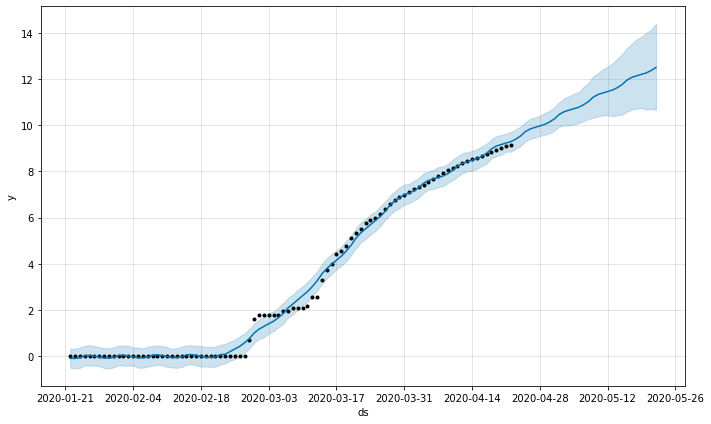

In [75]:
confirmed_forecast_plot = model_m.plot(forecast_m)

##**Fatalidades**

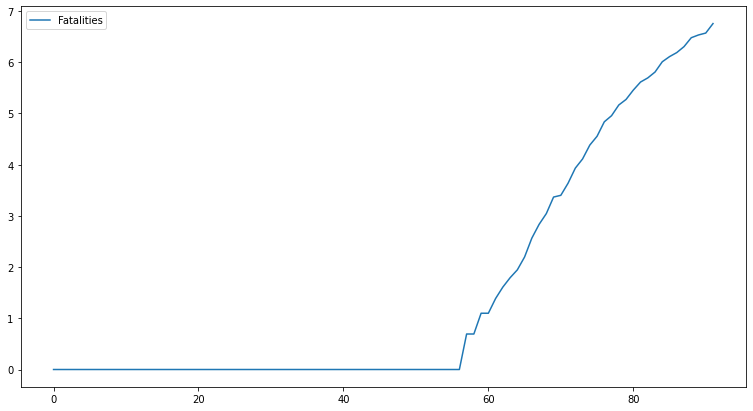

In [78]:
confirmed_m=df_m.groupby('Date')['Fatalities'].sum().to_frame().reset_index()
confirmed_m['Fatalities'] = np.log(1+confirmed_m['Fatalities'])
confirmed_m.plot(figsize=(13,7))
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


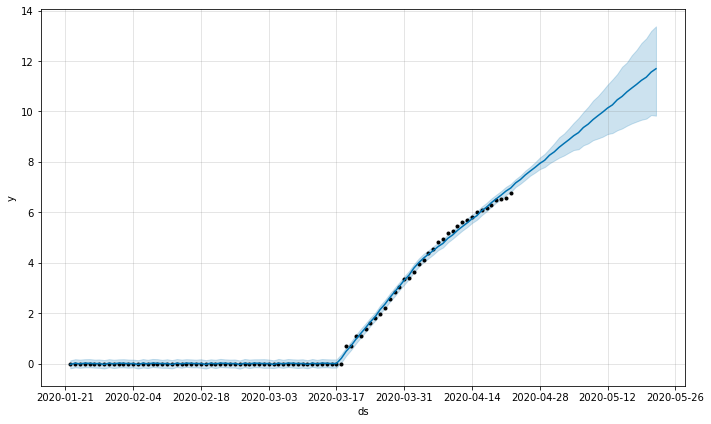

In [77]:
confirmed_m.columns = ['ds','y']
confirmed_m['ds'] = pd.to_datetime(confirmed_m['ds'])

model_m = Prophet(interval_width=0.95)
model_m.fit(confirmed_m)

future_m = model_m.make_future_dataframe(periods=30)
future_confirmed_m = future_m.copy() 
forecast_m = model_m.predict(future_m)
confirmed_forecast_plot = model_m.plot(forecast_m)